In [3]:
import utils 
from models.dnn import Net
import pandas as pd
import numpy as np 
from scipy.stats import pearsonr 
import  torch as th
import seaborn as sns 

In [4]:
model = Net.load_from_checkpoint("/home/ray/workspace/proj_fcst/notebook/checkpoints/2023-04-13_18-01_CCCLoss/epoch=9-val_loss=0.874-train_loss=0.871.ckpt")

In [5]:
X_test=  utils.df_test.filter(regex="X_")
y_test = utils.df_test.y_1
model.eval()
y_test_pred = model(th.tensor(X_test.values,dtype=th.float32)).detach().numpy().flatten()/1e2
mmt = utils.ModelMetrics(y_test_pred,y_test,utils.test_date)
mmt.evaluate()

Information Coefficient: 0.07624
Average Returns of Top 10%: 0.00201
Accuracy of Top 10%: 0.14060


In [6]:
df_metrics = pd.DataFrame(pd.DataFrame({"y_test":y_test,"y_test_pred":y_test_pred}))

In [7]:
df_metrics.describe()

,y_test,y_test_pred
count,2.813980e+06,2.813980e+06
mean,2.328628e-04,-1.882536e-06
std,2.839369e-02,2.253777e-04
min,-2.743507e-01,-5.446587e-03
25%,-1.420295e-02,-3.687877e-05
50%,-2.060175e-03,3.157930e-05
75%,1.158118e-02,9.186242e-05
max,4.614886e-01,1.112062e-03


<AxesSubplot: xlabel='y_test', ylabel='y_test_pred'>

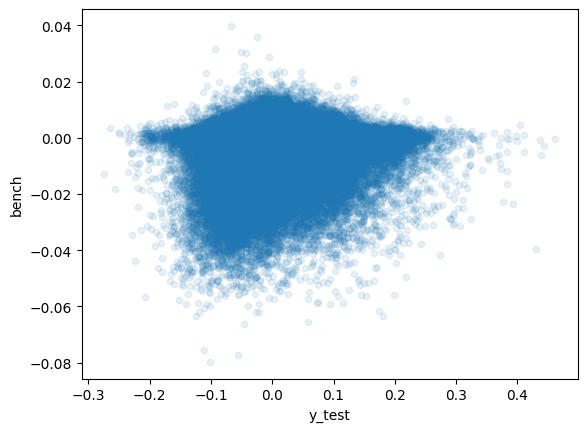

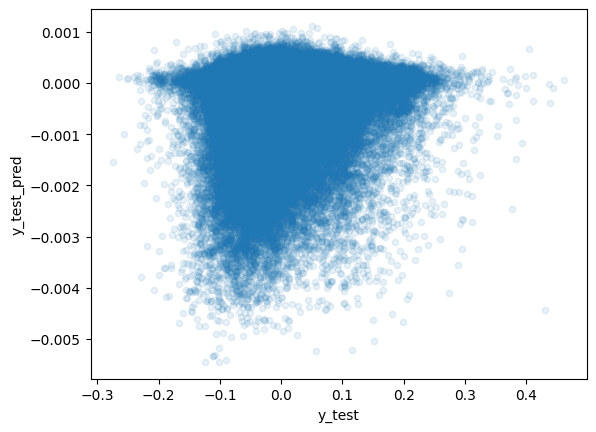

In [8]:
df_metrics['bench'] = utils.df_test.benchmark_yhat
df_metrics.plot(kind='scatter',x = 'y_test',y = 'bench',alpha=0.1)
df_metrics.plot(kind='scatter',x = 'y_test',y = 'y_test_pred',alpha=0.1)


In [9]:
import matplotlib.pyplot as plt

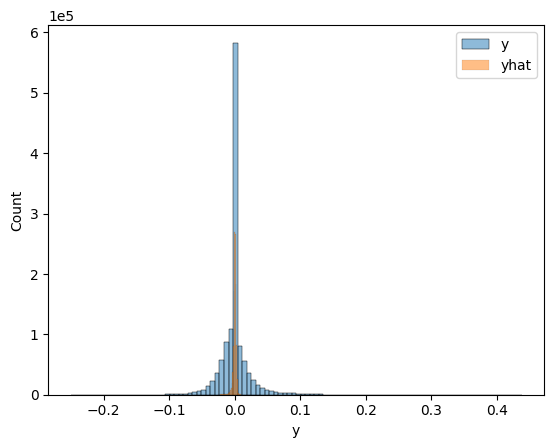

In [25]:
# sns.histplot(df_metrics['y_test_pred'],bins=100,color='red',label='y_hat')
df_metrics_tmp = df_metrics.sample(1200000)
ax = plt.gca()
mask = np.random.choice([True, False], size=df_metrics_tmp['y_test'].shape, p=[0.6, 0.4])
df_metrics_tmp['y_test'] = df_metrics_tmp['y_test'].where(mask, other=0)
# y 轴用科学记数法
ax.ticklabel_format(style='sci', scilimits=(-1,2), axis='y')
sns.histplot(df_metrics_tmp['y_test'],bins=100,alpha=0.5,label='y')
plt.xlabel('y')
sns.histplot(df_metrics_tmp['bench'],bins=100,alpha=0.5,label='yhat')
plt.legend()

In [17]:
len(df_metrics)

2813980

<AxesSubplot: ylabel='y_test_pred'>

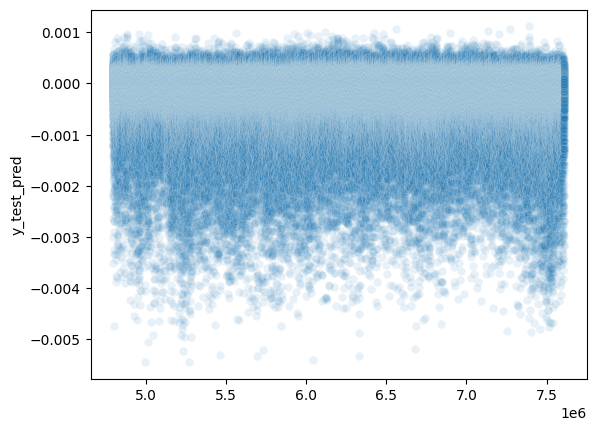

In [11]:
sns.scatterplot(x=df_metrics.index,y=df_metrics['y_test_pred'],alpha=0.1)

<AxesSubplot: ylabel='y_test'>

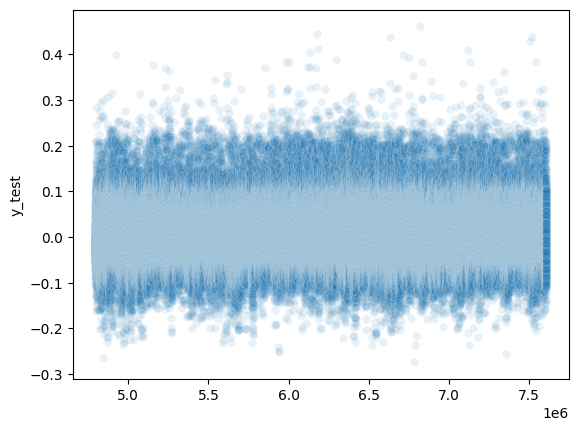

In [12]:
sns.scatterplot(x=df_metrics.index,y=df_metrics['y_test'],alpha=0.1)

<AxesSubplot: ylabel='benchmark_yhat'>

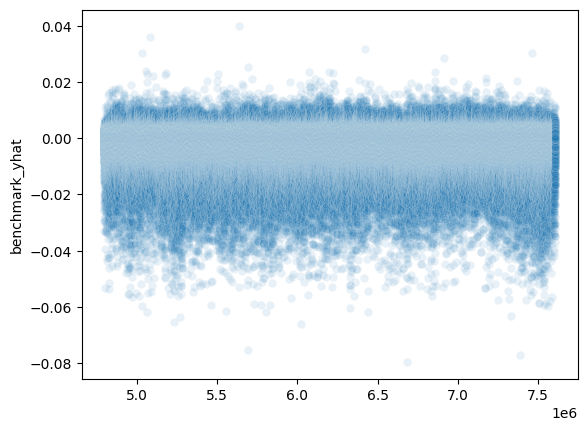

In [13]:
sns.scatterplot(x=df_metrics.index,y=utils.df_test.benchmark_yhat,alpha=0.1)